In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

# plt.rcParams['figure.dpi'] = 150

In [3]:
def read_and_transform(url):
    df = pd.read_csv(url)
    df.timestamp = [datetime.strptime(time, "%Y/%m/%d %H:%M:%S.%f") for time in df.timestamp]
    start_time = df.iloc[0]['timestamp']
    df['timestamp_label'] = [str((time - start_time).total_seconds()) for time in df.timestamp]
    return df

In [6]:
def plot_gpu_util(df, title=""):
    fig, ax = plt.subplots()
    ax = plt.plot(df['timestamp_label'],df[" utilization.gpu [%]"], label="gpu")
    ax = plt.plot(df['timestamp_label'],df[" utilization.memory [%]"], label="memory" )
    plt.legend()
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    plt.xlabel('time (s)')
    plt.ylabel('(%)')
    plt.title(title)
    plt.show()

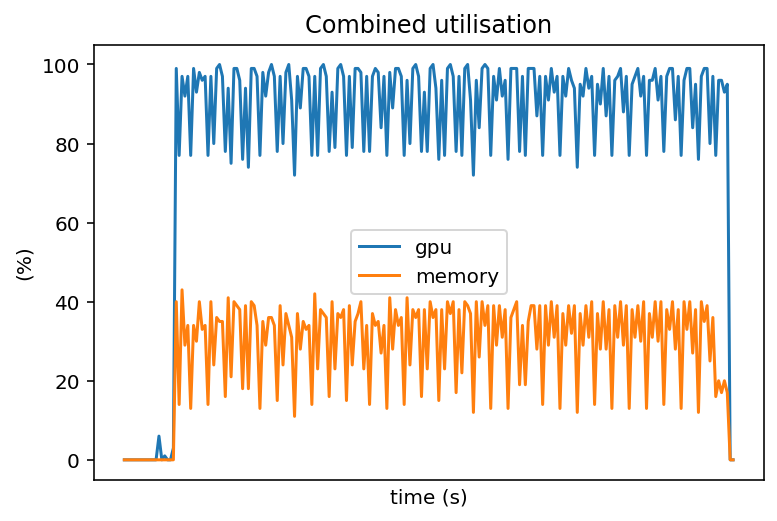

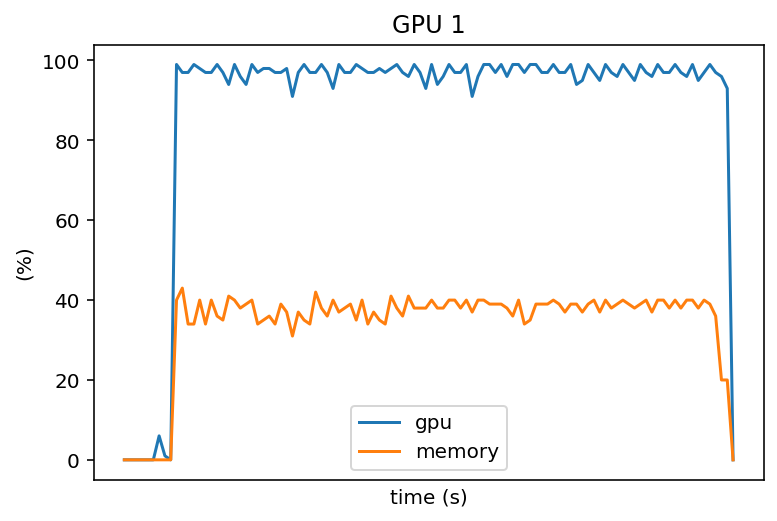

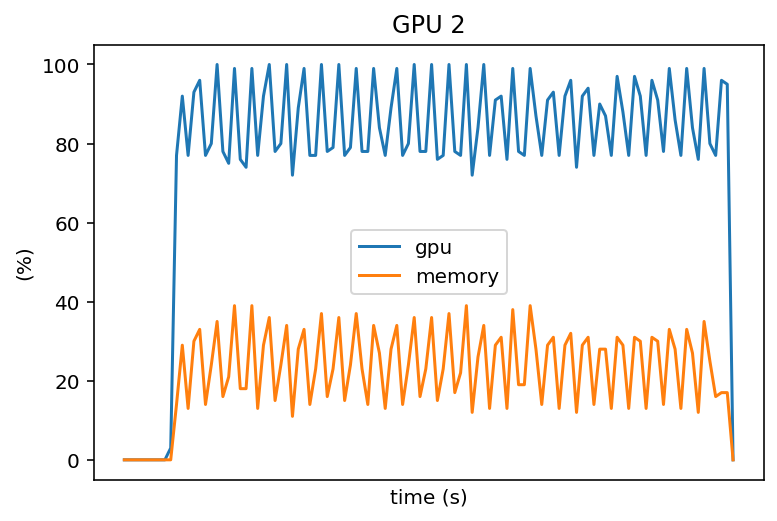

In [8]:
url = "nvidia/nvidia_power_MRPC_16_128.csv"
df = read_and_transform(url)
# print(df.columns)
plot_gpu_util(df, "Combined utilisation")
df_gpu1 = df.iloc[::2]
df_gpu2 = df.iloc[1::2]
plot_gpu_util(df_gpu1, "GPU 1")
plot_gpu_util(df_gpu2, "GPU 2")